# Table of Contents
    ## Creating bar charts
    ## Exporting charts
    ## Creating histograms and scatterplots
    ## Creating line charts
    ## Sampling data

# Setting Up Notebook

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import dataset
path = r'C:\Users\mmreg\OneDrive\Desktop\Data Analytics Course Work\Data Immersion\Tasks\04-2022 Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

# Creating Bar Charts

<AxesSubplot:>

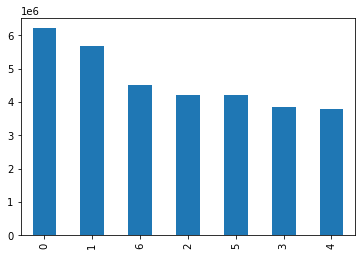

In [4]:
#create bar chart on order day of week
ords_prods_merge['order_dow'].value_counts().plot.bar()

<AxesSubplot:>

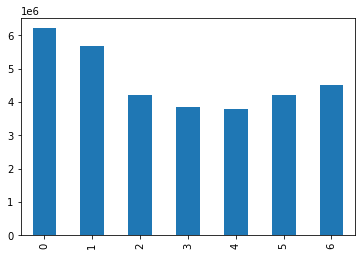

In [5]:
#practice sort.index()
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

In [6]:
#practice sort.index() on frequency counts
ords_prods_merge['order_dow'].value_counts(dropna = False).sort_index()

0    6209808
1    5665951
2    4217868
3    3844175
4    3787263
5    4209603
6    4500391
Name: order_dow, dtype: int64

<AxesSubplot:>

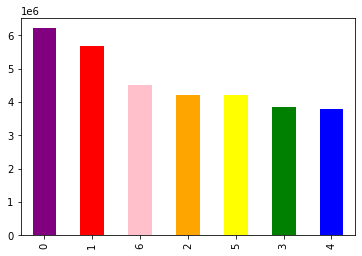

In [7]:
#add color to chart
ords_prods_merge['order_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

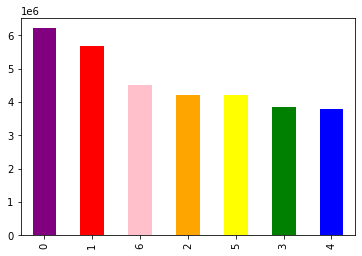

In [8]:
#save visualization to local device
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

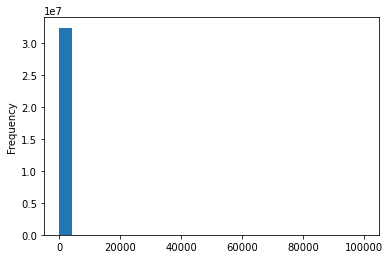

In [9]:
#build histogram
ords_prods_merge['prices'].plot.hist(bins=25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

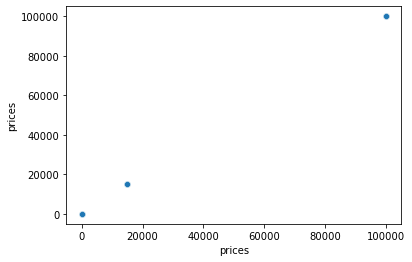

In [10]:
#build scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [11]:
#find cause of outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,_merge,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,avg_order,spender_type,med_order_day,cust_order_reg
1576,912404,17,prior,12,2,14,5.0,21553,5,0,...,both,High-Range Product,regularly busy,Most Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent Customer
1638,603376,17,prior,22,6,16,4.0,21553,3,1,...,both,High-Range Product,regularly busy,Most Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent Customer
16534,3264360,135,prior,2,2,21,13.0,21553,6,0,...,both,High-Range Product,regularly busy,Most Orders,4,New Customer,1154.792308,High Spender,12.0,Regular Customer
16540,892534,135,prior,3,0,8,12.0,21553,3,1,...,both,High-Range Product,busiest days,Average Orders,4,New Customer,1154.792308,High Spender,12.0,Regular Customer
53712,229704,342,prior,8,1,19,30.0,21553,9,0,...,both,High-Range Product,busiest days,Most Orders,16,Regular Customer,114.426619,High Spender,23.0,Non-Frequent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32350634,3172853,205650,prior,18,1,9,7.0,21553,17,1,...,both,High-Range Product,busiest days,Most Orders,25,Regular Customer,351.141618,High Spender,6.0,Frequent Customer
32377867,2504315,205818,prior,3,5,15,3.0,21553,13,0,...,both,High-Range Product,regularly busy,Most Orders,25,Regular Customer,170.073770,High Spender,12.5,Regular Customer
32377877,1108388,205818,prior,5,4,5,1.0,21553,5,1,...,both,High-Range Product,slowest days,Most Orders,25,Regular Customer,170.073770,High Spender,12.5,Regular Customer
32410707,1916142,206049,prior,1,2,17,NaN,21553,2,0,...,both,High-Range Product,regularly busy,Most Orders,5,New Customer,938.031250,High Spender,7.0,Frequent Customer


In [12]:
#assign outliers as missing values
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [13]:
#confirm nan replacement worked
ords_prods_merge['prices'].max()

25.0

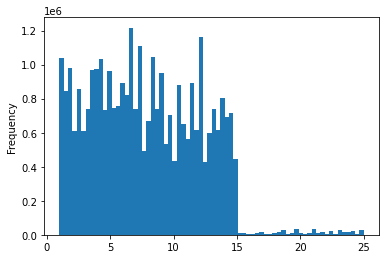

In [14]:
#create histogram with controlled data
histo = ords_prods_merge['prices'].plot.hist(bins=70)

In [15]:
#export histogram to local disk
histo.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

# Sampling Data

In [16]:
#create sample groups
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [17]:
#check work
dev

array([False,  True, False, ...,  True,  True,  True])

In [18]:
#store 70% of list into big dataframe
big = ords_prods_merge[dev]

In [19]:
#store 30% of list into small dataframe
small = ords_prods_merge[~dev]

In [20]:
#check work
len(ords_prods_merge)

32435059

In [21]:
len(big) + len(small)

32435059

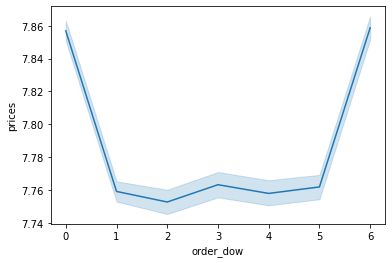

In [23]:
#create line chart of sample data
df_2 = small[['order_dow', 'prices']]
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')